In [1]:
import os                   # to interact with the operating system
import glob

import numpy as np
import pandas as pd
import xarray as xr

import pop_tools

import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy
import cartopy.feature as cfeature

import cmocean.cm as cmo
import matplotlib.ticker as ticker
from cartopy.util import add_cyclic_point
import matplotlib.patches as mpatches


ccrs = cartopy.crs

In [2]:
nature_coast = cartopy.feature.NaturalEarthFeature('physical', 'land', '50m',linewidth=0.5, edgecolor='black', facecolor='darkgray')

In [101]:
labelsize = 20

# Plot variables

## Temperature

In [36]:
temp_file = os.path.expanduser('~/phase1_CONDA/')+'/results/composites/temp_anomaly.nc'
ds_temp = xr.open_dataset(temp_file).roll(nlon=+100)

replacement_value = 0
# Replace non-finite values and masked values
ds_temp['TLAT'] = xr.where(
    np.logical_or(np.isnan(ds_temp['TLAT']), np.isinf(ds_temp['TLAT']) | np.ma.getmask(ds_temp['TLAT'])),
    replacement_value,
    ds_temp['TLAT']
)

ds_temp['TLONG'] = xr.where(
    np.logical_or(np.isnan(ds_temp['TLONG']), np.isinf(ds_temp['TLONG']) | np.ma.getmask(ds_temp['TLONG'])),
    replacement_value,
    ds_temp['TLONG']
)

plotting_data = ds_temp.TEMP.sel(z_t=slice(5.0000000e+02, 9.8470586e+04)).mean('z_t').squeeze()

In [39]:
vmin = -0.8 #-abs(ds_temp.TEMP).max()
vmax = -vmin #abs(ds_temp.TEMP).max()

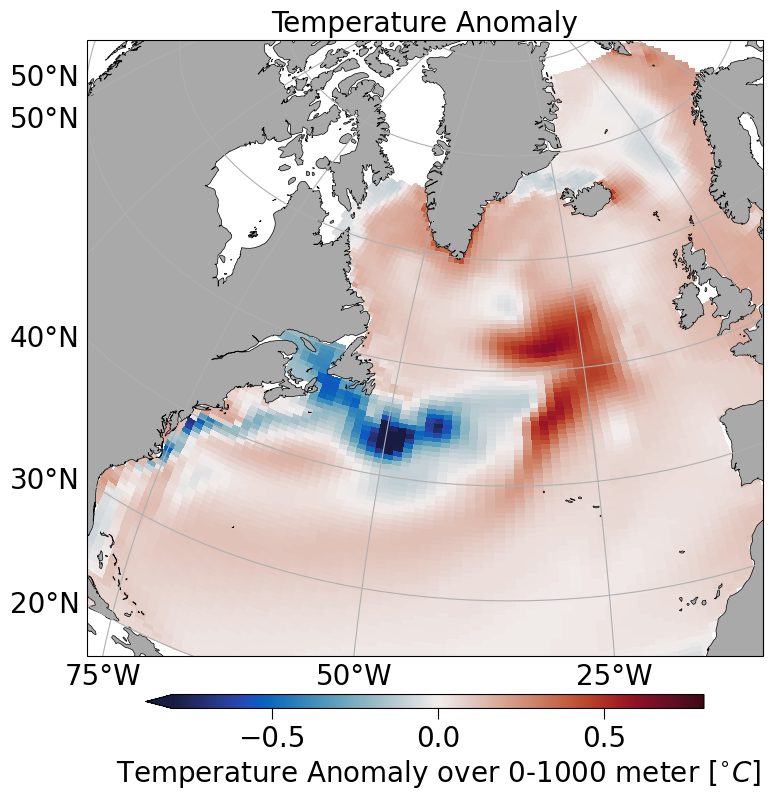

In [40]:
cbar_kwargs = {'orientation':'horizontal', 'shrink':0.8, 'aspect':40, 
               'label':'Temperature Anomaly over 0-1000 meter [$^{\circ}C$]', 'pad': 0.05}

plt.figure(figsize=(9,10))
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80,-10, 25, 80], crs=ccrs.PlateCarree())

pc = plotting_data.plot.pcolormesh(ax=ax, 
                                    transform=ccrs.PlateCarree(),
                                    x='TLONG', 
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap=cmo.balance,
                                    vmin = vmin, vmax = vmax, 
                                    )
                                    
pc.colorbar.ax.xaxis.label.set_size(labelsize)
pc.colorbar.ax.tick_params(axis='x', labelsize=labelsize, size=8)

ax.tick_params(axis='both', which='both', labelsize=labelsize, size=6)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': labelsize}
gl.ylabel_style = {'size': labelsize}

ax.add_feature(nature_coast);
#ax.coastlines()
plt.title('Temperature Anomaly', fontsize=labelsize)

plt.show()
#plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'temp_anomaly.png', bbox_inches='tight', dpi=300)

# Salinity

In [105]:
salt_file = os.path.expanduser('~/phase1_CONDA/')+'/results/composites/salt_anomaly.nc'
ds_salt = xr.open_dataset(salt_file).roll(nlon=+100)

replacement_value = 0
# Replace non-finite values and masked values
ds_salt['TLAT'] = xr.where(
    np.logical_or(np.isnan(ds_salt['TLAT']), np.isinf(ds_salt['TLAT']) | np.ma.getmask(ds_salt['TLAT'])),
    replacement_value,
    ds_salt['TLAT']
)

ds_salt['TLONG'] = xr.where(
    np.logical_or(np.isnan(ds_salt['TLONG']), np.isinf(ds_salt['TLONG']) | np.ma.getmask(ds_salt['TLONG'])),
    replacement_value,
    ds_salt['TLONG']
)

plotting_data = ds_salt.SALT.sel(z_t=slice(5.0000000e+02, 9.8470586e+04)).mean('z_t').squeeze()

In [106]:
vmin = -0.2
vmax = -vmin

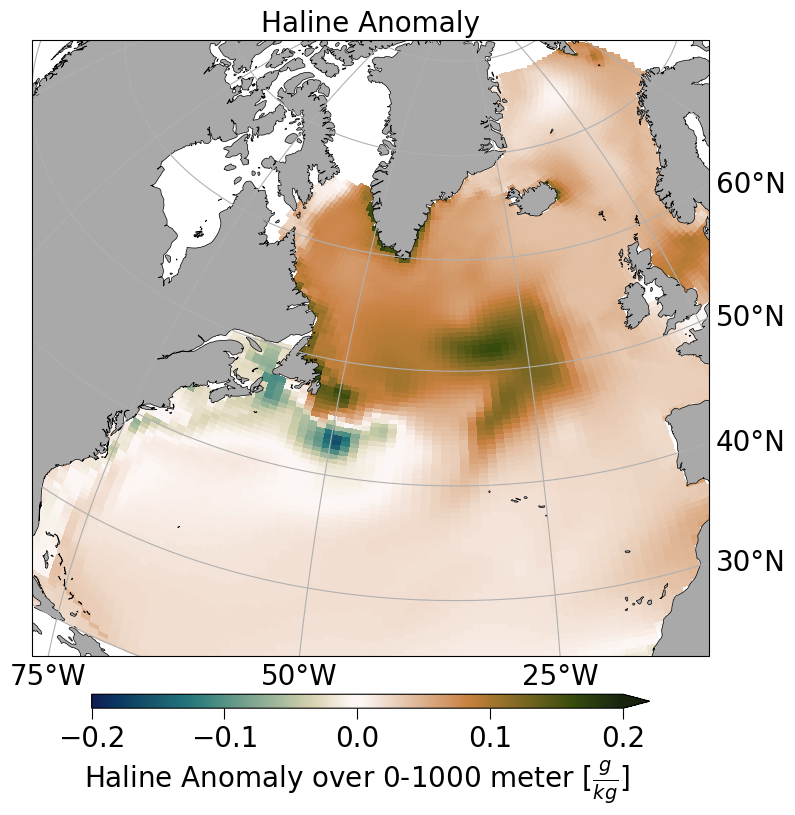

In [107]:
cbar_kwargs = {'orientation':'horizontal', 'shrink':0.8, 'aspect':40, 
               'label':r'Haline Anomaly over 0-1000 meter [$\frac{g}{kg}$]', 'pad': 0.05}

plt.figure(figsize=(9,10));
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80,-10, 25, 80], crs=ccrs.PlateCarree())

pc = plotting_data.plot.pcolormesh(ax=ax, 
                                    transform=ccrs.PlateCarree(),
                                    x='TLONG', 
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap=cmo.tarn_r,
                                    vmin = vmin, vmax = vmax, 
                                    )
pc.colorbar.ax.xaxis.label.set_size(labelsize)
pc.colorbar.ax.tick_params(axis='x', labelsize=labelsize, size=8)
ax.tick_params(axis='both', which='both', labelsize=labelsize, size=6)


gl = ax.gridlines(draw_labels=True)
gl.left_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': labelsize}
gl.ylabel_style = {'size': labelsize}

ax.add_feature(nature_coast);
plt.title('Haline Anomaly', fontsize=labelsize)

#plt.show()
plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'salt_anomaly.png', bbox_inches='tight', dpi=300)

## Density

In [44]:
sigma_file = os.path.expanduser('~/phase1_CONDA/')+'/results/composites/sigma_anomaly.nc'
ds_sigma = xr.open_dataset(sigma_file).roll(nlon=+100)

replacement_value = 0
# Replace non-finite values and masked values
ds_sigma['TLAT'] = xr.where(
    np.logical_or(np.isnan(ds_sigma['TLAT']), np.isinf(ds_sigma['TLAT']) | np.ma.getmask(ds_sigma['TLAT'])),
    replacement_value,
    ds_sigma['TLAT']
)

ds_sigma['TLONG'] = xr.where(
    np.logical_or(np.isnan(ds_sigma['TLONG']), np.isinf(ds_sigma['TLONG']) | np.ma.getmask(ds_sigma['TLONG'])),
    replacement_value,
    ds_sigma['TLONG']
)

plotting_data = ds_sigma.SIGMA_2.sel(z_t=slice(5.0000000e+02, 9.8470586e+04)).mean('z_t').squeeze()

In [45]:
vmin = -0.1 #abs(ds_sigma.SIGMA_2).max()
vmax = -vmin 

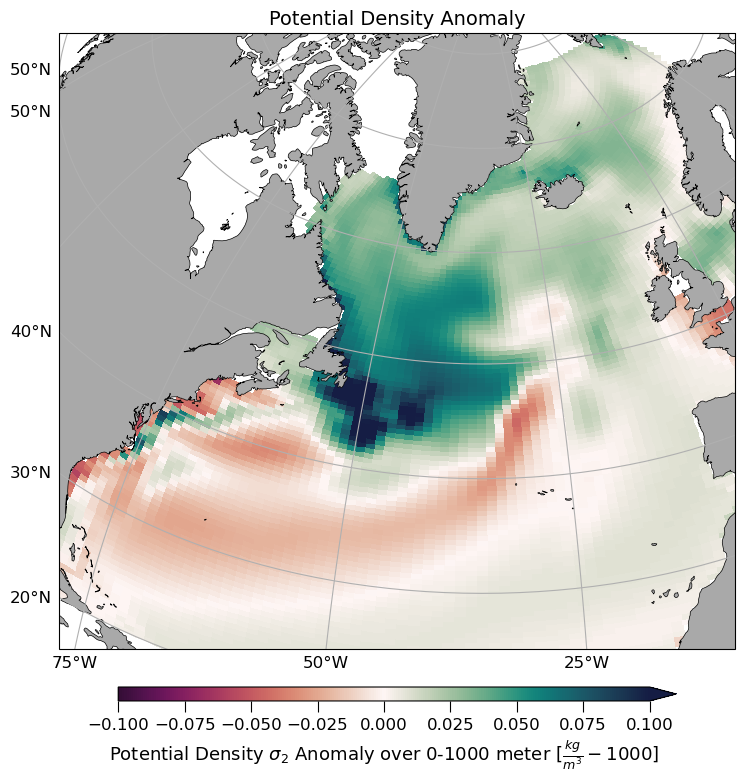

In [46]:
cbar_kwargs = {'orientation':'horizontal', 'shrink':0.8, 'aspect':40, 
               'label':r'Potential Density $\sigma_2$ Anomaly over 0-1000 meter [$\frac{kg}{m^3} -1000$]', 'pad': 0.05}

plt.figure(figsize=(9,10));
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80,-10, 25, 80], crs=ccrs.PlateCarree())

pc = plotting_data.plot.pcolormesh(ax=ax, 
                                    transform=ccrs.PlateCarree(),
                                    x='TLONG', 
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap=cmo.curl_r,
                                    vmin = vmin, vmax = vmax, 
                                    )
pc.colorbar.ax.xaxis.label.set_size(13)
pc.colorbar.ax.tick_params(axis='x', labelsize=12, size=8)
ax.tick_params(axis='both', which='both', labelsize=12, size=6)


gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

ax.add_feature(nature_coast);
plt.title('Potential Density Anomaly', fontsize=14)

#plt.show()
plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'sigma_anomaly.png', bbox_inches='tight', dpi=300)

## Surface Heat flux

In [108]:
shf_file = os.path.expanduser('~/phase1_CONDA/')+'/results/composites/shf_anomaly.nc'
ds_shf = xr.open_dataset(shf_file).roll(nlon=+100)

replacement_value = 0
# Replace non-finite values and masked values@
ds_shf['TLAT'] = xr.where(
    np.logical_or(np.isnan(ds_shf['TLAT']), np.isinf(ds_shf['TLAT']) | np.ma.getmask(ds_shf['TLAT'])),
    replacement_value,
    ds_shf['TLAT']
)

ds_shf['TLONG'] = xr.where(
    np.logical_or(np.isnan(ds_shf['TLONG']), np.isinf(ds_shf['TLONG']) | np.ma.getmask(ds_shf['TLONG'])),
    replacement_value,
    ds_shf['TLONG']
)

plotting_data = ds_shf.SHF

In [109]:
vmin = 40 #-abs(ds_shf.SHF).max()
vmax = -vmin 

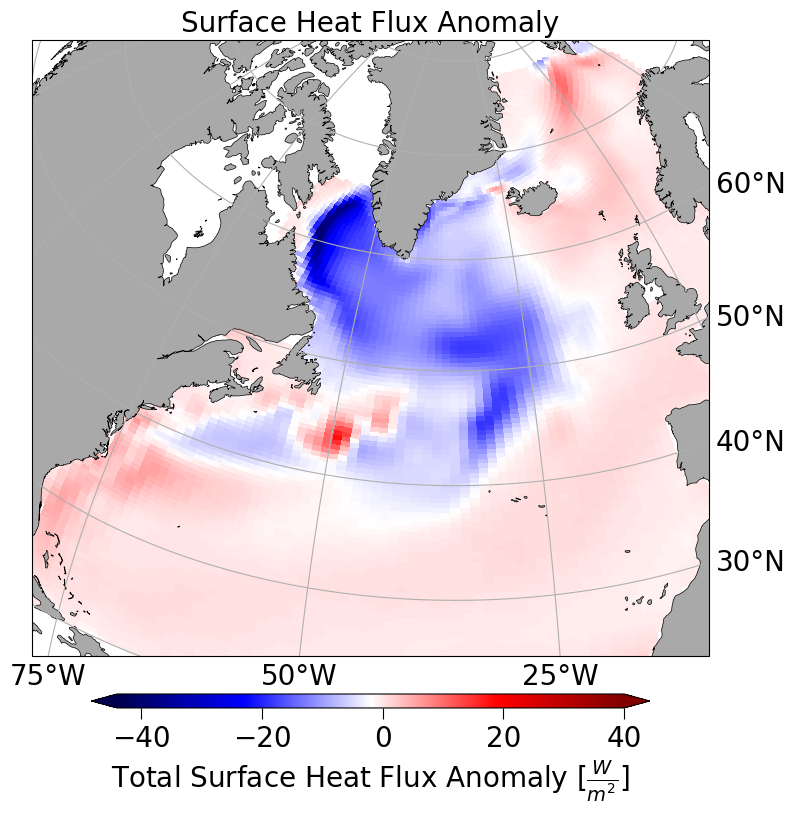

In [111]:
cbar_kwargs = {'orientation':'horizontal', 'shrink':0.8, 'aspect':40, 
               'label':r'Total Surface Heat Flux Anomaly [$\frac{W}{m^2}$]', 'pad': 0.05}

plt.figure(figsize=(9,10));
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80,-10, 25, 80], crs=ccrs.PlateCarree())

pc = plotting_data.plot.pcolormesh(ax=ax, 
                                    transform=ccrs.PlateCarree(),
                                    x='TLONG', 
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap='seismic',
                                    vmin = vmin, vmax = vmax, 
                                    )
pc.colorbar.ax.xaxis.label.set_size(labelsize)
pc.colorbar.ax.tick_params(axis='x', labelsize=labelsize, size=8)
ax.tick_params(axis='both', which='both', labelsize=labelsize, size=6)


gl = ax.gridlines(draw_labels=True)
gl.left_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': labelsize}
gl.ylabel_style = {'size': labelsize}

ax.add_feature(nature_coast);
plt.title('Surface Heat Flux Anomaly', fontsize=labelsize)

#plt.show()
plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'shf_anomaly.png', bbox_inches='tight', dpi=300, transparent=True)

## Mixed layer depth

In [60]:
hmxl_file = os.path.expanduser('~/phase1_CONDA/')+'/results/composites/hmxl_anomaly.nc'
ds_hmxl = xr.open_dataset(hmxl_file)

replacement_value = 0
# Replace non-finite values and masked values
ds_hmxl['TLAT'] = xr.where(
    np.logical_or(np.isnan(ds_hmxl['TLAT']), np.isinf(ds_hmxl['TLAT']) | np.ma.getmask(ds_hmxl['TLAT'])),
    replacement_value,
    ds_hmxl['TLAT']
)

ds_hmxl['TLONG'] = xr.where(
    np.logical_or(np.isnan(ds_hmxl['TLONG']), np.isinf(ds_hmxl['TLONG']) | np.ma.getmask(ds_hmxl['TLONG'])),
    replacement_value,
    ds_hmxl['TLONG']
)

plotting_data = ds_hmxl.HMXL*1e-2

In [61]:
vmin = -300
vmax = -vmin

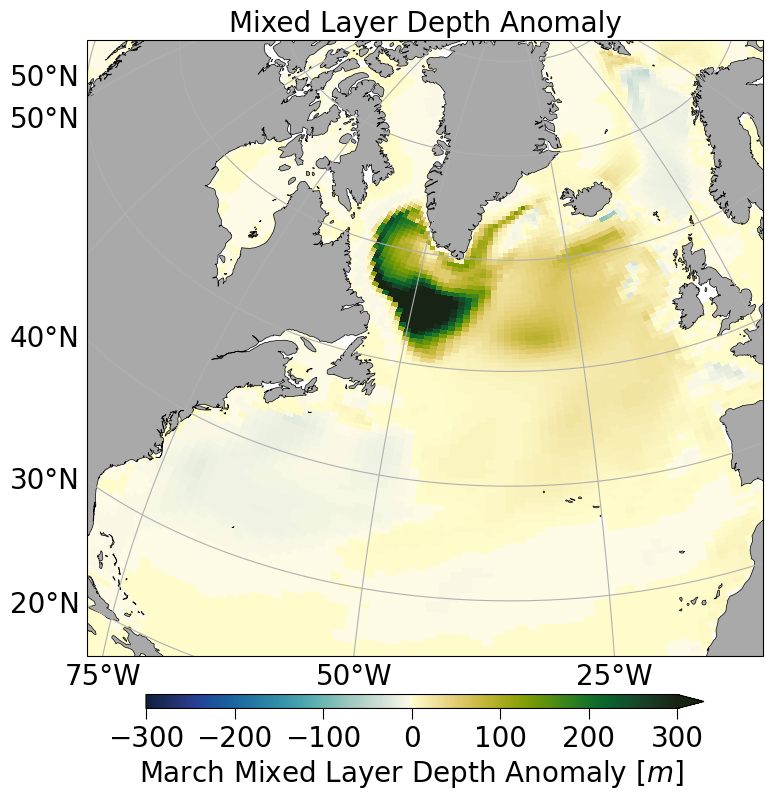

In [62]:
cbar_kwargs = {'orientation':'horizontal', 'shrink':0.8, 'aspect':40, 
               'label':r'March Mixed Layer Depth Anomaly [$m$]', 'pad': 0.05}

plt.figure(figsize=(9,10));
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80,-10, 25, 80], crs=ccrs.PlateCarree())

pc = plotting_data.plot.pcolormesh(ax=ax, 
                                    transform=ccrs.PlateCarree(),
                                    x='TLONG', 
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap=cmo.delta,
                                    vmin = vmin, vmax = vmax, 
                                    )
pc.colorbar.ax.xaxis.label.set_size(labelsize)
pc.colorbar.ax.tick_params(axis='x', labelsize=labelsize, size=8)
ax.tick_params(axis='both', which='both', labelsize=labelsize, size=6)


gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': labelsize}
gl.ylabel_style = {'size': labelsize}

ax.add_feature(nature_coast);
plt.title('Mixed Layer Depth Anomaly', fontsize=labelsize)

#plt.show()
plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'hmxl_anomaly.png', bbox_inches='tight', dpi=300)

## Sea Level Pressure

In [63]:
psl_file = os.path.expanduser('~/phase1_CONDA/')+'/results/composites/psl_anomaly.nc'
ds_psl = xr.open_dataset(psl_file)

plotting_data = ds_psl.PSL

In [64]:
vmin = -80
vmax = -vmin

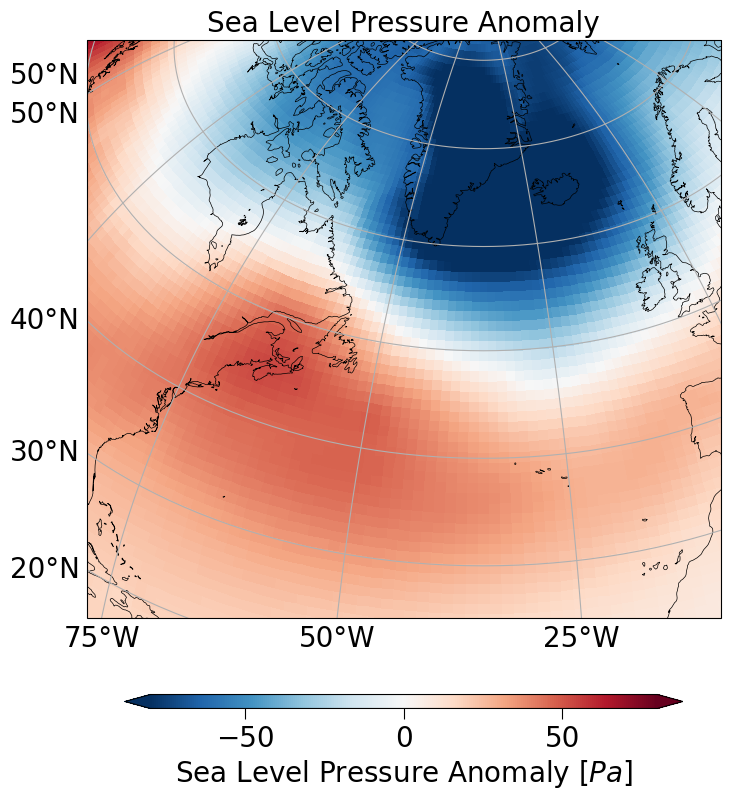

In [86]:
cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, 'aspect':40, 
               'label':r'Sea Level Pressure Anomaly [$Pa$]', 'pad': 0.1}

plt.figure(figsize=(12,10));
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80,-10, 25, 80], crs=ccrs.PlateCarree())

pc = plotting_data.plot.pcolormesh(ax=ax, 
                                    transform=ccrs.PlateCarree(),
                                    x='lon', 
                                    y='lat',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap='RdBu_r',
                                    vmin = vmin, vmax = vmax, 
                                    )
pc.colorbar.ax.xaxis.label.set_size(labelsize)
pc.colorbar.ax.tick_params(axis='x', labelsize=labelsize, size=8)
ax.tick_params(axis='both', which='both', labelsize=labelsize, size=6)


gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': labelsize}
gl.ylabel_style = {'size': labelsize}

psl_coast = cartopy.feature.NaturalEarthFeature('physical', 'land', '50m',linewidth=0.5, edgecolor='black', facecolor='none')
ax.add_feature(psl_coast);
plt.title('Sea Level Pressure Anomaly', fontsize=labelsize)

#plt.show()
plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'psl_anomaly.png', bbox_inches='tight', dpi=300)

## Barotropic Streamfunction

In [87]:
# setting up of regional mask
grid_name = 'POP_gx1v7'
region_defs = {
    'SubpolarAtlantic':[
        {'match': {'REGION_MASK': [6]}, 'bounds': {'TLAT': [15.0, 66.0], 'TLONG': [260.0, 360.0]}}   
    ],
    'LabradorSea': [
        {'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [45.0, 66.0]}}        
    ]}
maskBSF = pop_tools.region_mask_3d(grid_name, 
                                  region_defs=region_defs, 
                                  mask_name='Subpolar Gyre')
maskBSF = maskBSF.sum('region')  

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [93]:
bsf_file = os.path.expanduser('~/phase1_CONDA/')+'/results/composites/BSF_anomaly.nc'
anom_bsf_ds = xr.open_dataarray(bsf_file).roll(nlon=+100).where(maskBSF == 1)

bsf_ds = xr.open_dataarray('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/BSFcomposite-test.nc').roll(nlon=+100).where(maskBSF == 1)

temp_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/temp/temp_1231.001.nc'
ds_temp = xr.open_dataset(temp_file).isel(time=0, z_t=0).squeeze().roll(nlon=+100).where(maskBSF == 1)

replacement_value = 0
ds_temp['ULAT'] = xr.where(
    np.logical_or(np.isnan(ds_temp['ULAT']), np.isinf(ds_temp['ULAT']) | np.ma.getmask(ds_temp['ULAT'])),
    replacement_value,
    ds_temp['ULAT']
)

ds_temp['ULONG'] = xr.where(
    np.logical_or(np.isnan(ds_temp['ULONG']), np.isinf(ds_temp['ULONG']) | np.ma.getmask(ds_temp['ULONG'])),
    replacement_value,
    ds_temp['ULONG']
)

In [94]:
vmin = -8
vmax = -vmin

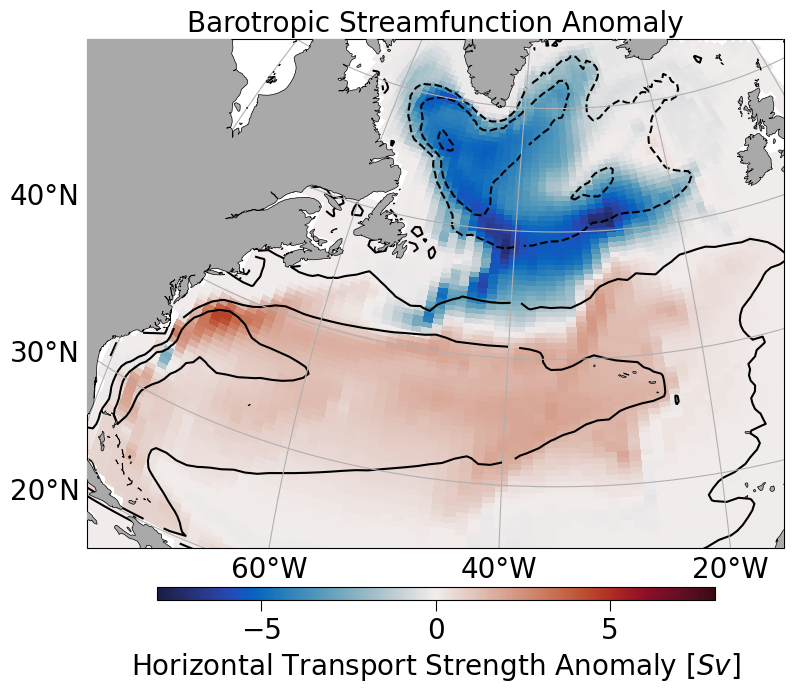

In [103]:
cbar_kwargs = {'orientation': 'horizontal', 'shrink': 0.8, 'aspect': 40,
               'label': 'Horizontal Transport Strength Anomaly [$Sv$]', 'pad': 0.05}

fig, ax = plt.subplots(figsize=(9, 10), subplot_kw={'projection': ccrs.Orthographic(central_latitude=40, central_longitude=-35)})
ax.set_extent([-80, -15, 25, 60], crs=ccrs.PlateCarree())

pc = ax.pcolormesh(ds_temp.ULONG, ds_temp.ULAT, anom_bsf_ds, 
                   transform=ccrs.PlateCarree(),
                   cmap=cmo.balance, vmin=vmin, vmax=vmax)

cbar = plt.colorbar(pc, **cbar_kwargs)
cbar.ax.xaxis.label.set_size(labelsize)
cbar.ax.tick_params(axis='x', labelsize=labelsize, size=8)

ax.tick_params(axis='both', which='both', labelsize=labelsize, size=6)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': labelsize}
gl.ylabel_style = {'size': labelsize}

plt.contour(ds_temp.ULONG, ds_temp.ULAT, bsf_ds.isel(time=slice(0,40)).mean('time'), 
                   transform=ccrs.PlateCarree(), colors='k')
ax.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '50m',linewidth=0.5, edgecolor='black', facecolor='darkgray'), zorder=10)
ax.set_title('Barotropic Streamfunction Anomaly', fontsize=labelsize)

#plt.show()
plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'bsf_anomaly.png', bbox_inches='tight', dpi=300, transparent=True)

## Depth Streamfunction

In [89]:
dmoc_file = os.path.expanduser('~/phase1_CONDA/')+'/results/composites/dMOC_anomaly.nc'
dmoc_ds = xr.open_dataarray(dmoc_file)

ps_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/temp/temp_1231.001.nc'

ds_ps = xr.open_dataset(ps_file).isel(time=0, nlon=0).squeeze()
replacement_value = 0
# Replace non-finite values and masked values
ds_ps['ULAT'] = xr.where(
    np.logical_or(np.isnan(ds_ps['ULAT']), np.isinf(ds_ps['ULAT']) | np.ma.getmask(ds_ps['ULAT'])),
    replacement_value,
    ds_ps['ULAT'])

In [90]:
vmin = -2.5
vmax = -vmin

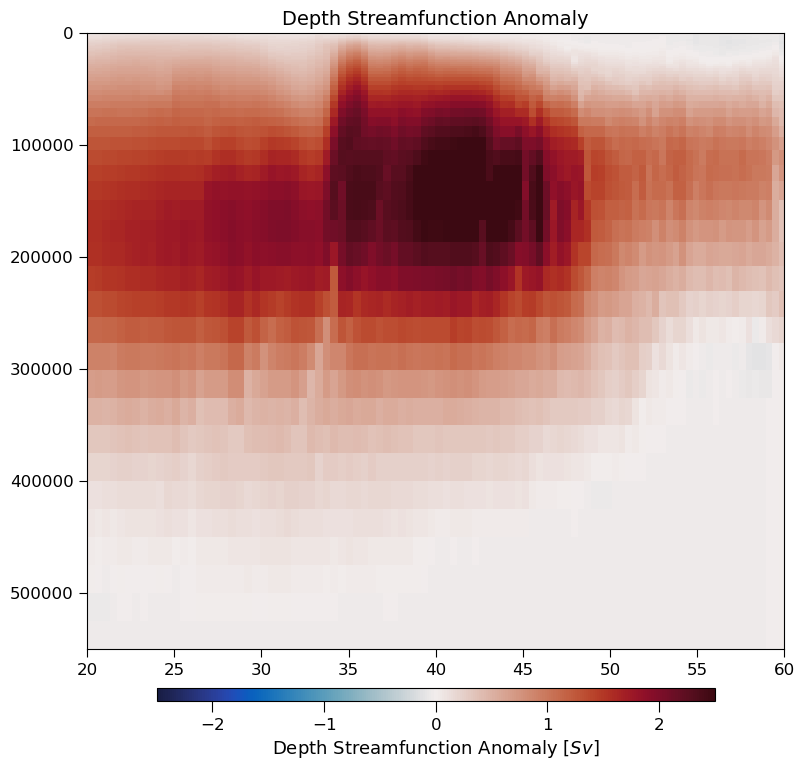

In [92]:
cbar_kwargs = {'orientation': 'horizontal', 'shrink': 0.8, 'aspect': 40,
               'label': 'Depth Streamfunction Anomaly [$Sv$]', 'pad': 0.05}

fig, ax = plt.subplots(figsize=(9, 10))

pc = ax.pcolormesh(ds_ps.ULAT, ds_ps.z_t, dmoc_ds,
                   cmap=cmo.balance,
                   vmin=vmin, vmax=vmax)

cbar = plt.colorbar(pc, **cbar_kwargs)
cbar.ax.xaxis.label.set_size(13)
cbar.ax.tick_params(axis='x', labelsize=12, size=8)

ax.tick_params(axis='both', which='both', labelsize=12, size=6)
ax.set_title('Depth Streamfunction Anomaly', fontsize=14)
ax.invert_yaxis()
ax.set_xlim([20, 60])  
plt.show()

## Density Streamfunction

In [62]:
smoc_file = os.path.expanduser('~/phase1_CONDA/')+'/results/composites/sMOC_anomaly.nc'
smoc_ds = xr.open_dataset(smoc_file)

ps_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/temp/temp_1231.001.nc'

ds_ps = xr.open_dataset(ps_file).isel(time=0, nlon=0).squeeze()
replacement_value = 0
# Replace non-finite values and masked values
ds_ps['TLAT'] = xr.where(
    np.logical_or(np.isnan(ds_ps['TLAT']), np.isinf(ds_ps['TLAT']) | np.ma.getmask(ds_ps['TLAT'])),
    replacement_value,
    ds_ps['TLAT']
)

ds_ps['TLONG'] = xr.where(
    np.logical_or(np.isnan(ds_ps['TLONG']), np.isinf(ds_ps['TLONG']) | np.ma.getmask(ds_ps['TLONG'])),
    replacement_value,
    ds_ps['TLONG']
)

In [64]:
vmin = -12.5
vmax = -vmin

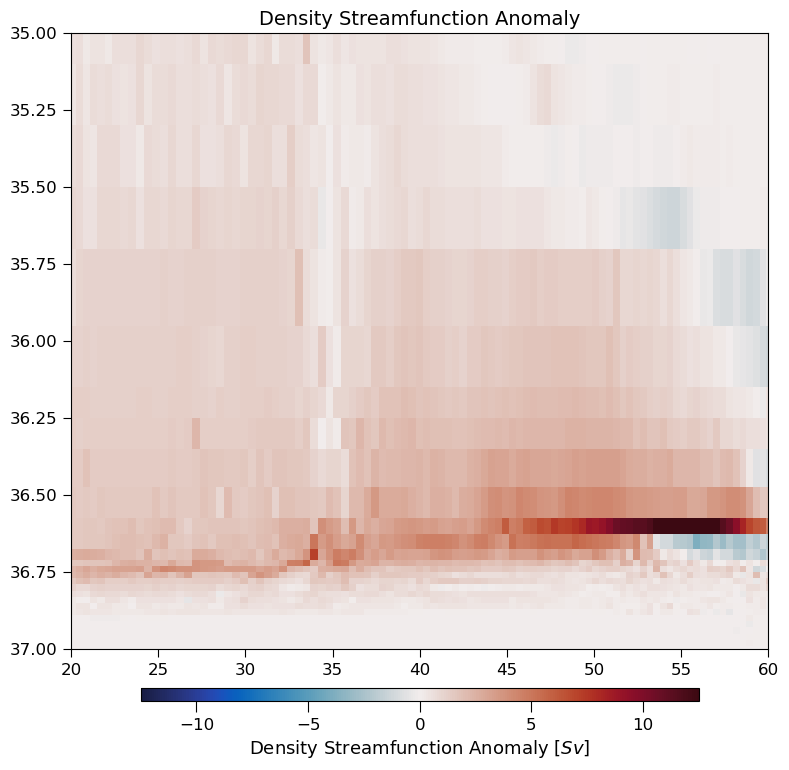

In [67]:
cbar_kwargs = {'orientation': 'horizontal', 'shrink': 0.8, 'aspect': 40,
               'label': 'Density Streamfunction Anomaly [$Sv$]', 'pad': 0.05}

fig, ax = plt.subplots(figsize=(9, 10))

pc = ax.pcolormesh(ds_ps.TLAT.isel(nlat=(slice(250,360))), smoc_ds.sigma, smoc_ds.densMOC*1e2,
                   cmap=cmo.balance,
                   vmin=vmin, vmax=vmax)

cbar = plt.colorbar(pc, **cbar_kwargs)
cbar.ax.xaxis.label.set_size(13)
cbar.ax.tick_params(axis='x', labelsize=12, size=8)

ax.tick_params(axis='both', which='both', labelsize=12, size=6)
ax.set_title('Density Streamfunction Anomaly', fontsize=14)
ax.invert_yaxis()
ax.set_xlim([20, 60])  
ax.set_ylim([37, 35])  
plt.show()

## Sea Surface Height

In [99]:
ssh_file = os.path.expanduser('~/phase1_CONDA/')+'/results/composites/ssh_anomaly.nc'
ds_ssh = xr.open_dataset(ssh_file).roll(nlon=+100)

replacement_value = 0
# Replace non-finite values and masked values
ds_ssh['TLAT'] = xr.where(
    np.logical_or(np.isnan(ds_ssh['TLAT']), np.isinf(ds_ssh['TLAT']) | np.ma.getmask(ds_ssh['TLAT'])),
    replacement_value,
    ds_ssh['TLAT']
)

ds_ssh['TLONG'] = xr.where(
    np.logical_or(np.isnan(ds_ssh['TLONG']), np.isinf(ds_ssh['TLONG']) | np.ma.getmask(ds_ssh['TLONG'])),
    replacement_value,
    ds_ssh['TLONG']
)

plotting_data = ds_ssh.SSH

In [104]:
vmin = 0.08
vmax = -vmin

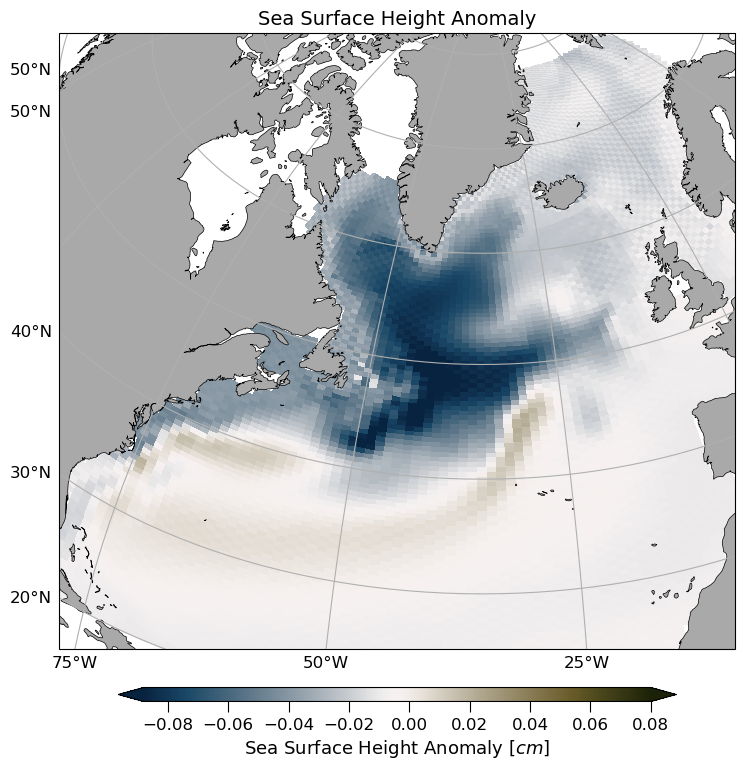

In [105]:
cbar_kwargs = {'orientation':'horizontal', 'shrink':0.8, 'aspect':40, 
               'label':r'Sea Surface Height Anomaly [$cm$]', 'pad': 0.05}

plt.figure(figsize=(9,10));
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80,-10, 25, 80], crs=ccrs.PlateCarree())

pc = plotting_data.plot.pcolormesh(ax=ax, 
                                    transform=ccrs.PlateCarree(),
                                    x='TLONG', 
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap=cmo.diff,
                                    vmin = vmin, vmax = vmax, 
                                    )
pc.colorbar.ax.xaxis.label.set_size(13)
pc.colorbar.ax.tick_params(axis='x', labelsize=12, size=8)
ax.tick_params(axis='both', which='both', labelsize=12, size=6)


gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

ax.add_feature(nature_coast);
plt.title('Sea Surface Height Anomaly', fontsize=14)
plt.show()

## Sea Ice Margin

In [3]:
aice_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/AICEcomposite.nc'
ds_aice = xr.open_dataset(aice_file)

replacement_value = 0
# Replace non-finite values and masked values
ds_aice['TLAT'] = xr.where(
    np.logical_or(np.isnan(ds_aice['TLAT']), np.isinf(ds_aice['TLAT']) | np.ma.getmask(ds_aice['TLAT'])),
    replacement_value,
    ds_aice['TLAT']
)

ds_aice['TLON'] = xr.where(
    np.logical_or(np.isnan(ds_aice['TLON']), np.isinf(ds_aice['TLON']) | np.ma.getmask(ds_aice['TLON'])),
    replacement_value,
    ds_aice['TLON']
)



In [4]:
before = ds_aice.isel(time=slice(0,30)).mean('time')
after = ds_aice.isel(time=slice(45,60)).mean('time')

In [5]:
before_mask = before >= 0.15
after_mask = after >= 0.15

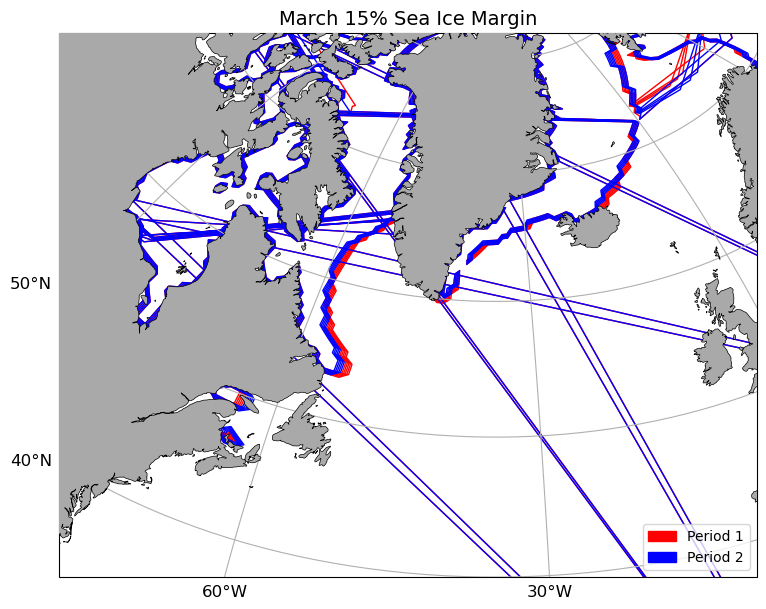

In [9]:
plt.figure(figsize=(9,10));
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80,-10, 40, 80], crs=ccrs.PlateCarree())

ax.tick_params(axis='both', which='both', labelsize=12, size=6)

pc = before_mask.aice.plot.contour(ax=ax, transform=ccrs.PlateCarree(), x='TLON', y='TLAT', colors=['red'], linewidths=1)
qc = after_mask.aice.plot.contour(ax=ax, transform=ccrs.PlateCarree(), x='TLON', y='TLAT',colors=['blue'], linewidths=1)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

ax.add_feature(nature_coast, zorder=10)
plt.title('March 15% Sea Ice Margin', fontsize=14)

# Creating legend handles and labels
blue_patch = mpatches.Patch(color='red', label='Period 1')
red_patch = mpatches.Patch(color='blue', label='Period 2')

# Adding legend with handles and labels
plt.legend(handles=[blue_patch, red_patch], loc='lower right', bbox_to_anchor=(1, 0))

plt.show()

In [ ]:
plotting_data = before.aice

cbar_kwargs = {'orientation':'horizontal', 'shrink':0.8, 'aspect':40, 
               'label':r'March Sea Ice Margin [0,1]', 'pad': 0.05}

plt.figure(figsize=(9,10));
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80,-10, 40, 80], crs=ccrs.PlateCarree())


pc = plotting_data.plot.pcolormesh(ax=ax, 
                                    transform=ccrs.PlateCarree(),
                                    x='TLON', 
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap=cmo.ice,
                                    )
pc.colorbar.ax.xaxis.label.set_size(13)
pc.colorbar.ax.tick_params(axis='x', labelsize=12, size=8)

ax.tick_params(axis='both', which='both', labelsize=12, size=6)

pc = before_mask.aice.plot.contour(ax=ax, transform=ccrs.PlateCarree(), x='TLON', y='TLAT', colors=['red'], linewidths=1)
qc = after_mask.aice.plot.contour(ax=ax, transform=ccrs.PlateCarree(), x='TLON', y='TLAT',colors=['blue'], linewidths=1)


gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

ax.add_feature(nature_coast);
plt.title('March 15% Sea Ice Margin', fontsize=14)
plt.show()

In [ ]:
plotting_data = after.aice

cbar_kwargs = {'orientation':'horizontal', 'shrink':0.8, 'aspect':40, 
               'label':r'March Sea Ice Margin [0,1]', 'pad': 0.05}

plt.figure(figsize=(9,10));
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80,-10, 40, 80], crs=ccrs.PlateCarree())


pc = plotting_data.plot.pcolormesh(ax=ax, 
                                    transform=ccrs.PlateCarree(),
                                    x='TLON', 
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap=cmo.ice,
                                    )
pc.colorbar.ax.xaxis.label.set_size(13)
pc.colorbar.ax.tick_params(axis='x', labelsize=12, size=8)

ax.tick_params(axis='both', which='both', labelsize=12, size=6)

pc = before_mask.aice.plot.contour(ax=ax, transform=ccrs.PlateCarree(), x='TLON', y='TLAT', colors=['red'], linewidths=1)
qc = after_mask.aice.plot.contour(ax=ax, transform=ccrs.PlateCarree(), x='TLON', y='TLAT',colors=['blue'], linewidths=1)


gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

ax.add_feature(nature_coast);
plt.title('March 15% Sea Ice Margin', fontsize=14)
plt.show()

In [ ]:
plotting_data = after.aice - before.aice

cbar_kwargs = {'orientation':'horizontal', 'shrink':0.8, 'aspect':40, 
               'label':r'March Sea Ice Margin Anomaly [0,1]', 'pad': 0.05}

plt.figure(figsize=(9,10));
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80,-10, 40, 80], crs=ccrs.PlateCarree())


pc = plotting_data.plot.pcolormesh(ax=ax, 
                                    transform=ccrs.PlateCarree(),
                                    x='TLON', 
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap=cmo.diff,
                                    )
pc.colorbar.ax.xaxis.label.set_size(13)
pc.colorbar.ax.tick_params(axis='x', labelsize=12, size=8)

ax.tick_params(axis='both', which='both', labelsize=12, size=6)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

ax.add_feature(nature_coast);
plt.title('March 15% Sea Ice Margin Anomaly', fontsize=14)
plt.show()

## Different depths

### Potential Density

In [11]:
sigma_file = os.path.expanduser('~/phase1_CONDA/')+'/results/composites/sigma_anomaly.nc'
ds_sigma = xr.open_dataset(sigma_file).roll(nlon=+100)

replacement_value = 0
# Replace non-finite values and masked values
ds_sigma['TLAT'] = xr.where(
    np.logical_or(np.isnan(ds_sigma['TLAT']), np.isinf(ds_sigma['TLAT']) | np.ma.getmask(ds_sigma['TLAT'])),
    replacement_value,
    ds_sigma['TLAT']
)

ds_sigma['TLONG'] = xr.where(
    np.logical_or(np.isnan(ds_sigma['TLONG']), np.isinf(ds_sigma['TLONG']) | np.ma.getmask(ds_sigma['TLONG'])),
    replacement_value,
    ds_sigma['TLONG']
)



In [12]:
ds_sigma.z_t.values

array([5.0000000e+02, 1.5000000e+03, 2.5000000e+03, 3.5000000e+03,
       4.5000000e+03, 5.5000000e+03, 6.5000000e+03, 7.5000000e+03,
       8.5000000e+03, 9.5000000e+03, 1.0500000e+04, 1.1500000e+04,
       1.2500000e+04, 1.3500000e+04, 1.4500000e+04, 1.5500000e+04,
       1.6509840e+04, 1.7547904e+04, 1.8629127e+04, 1.9766027e+04,
       2.0971139e+04, 2.2257828e+04, 2.3640883e+04, 2.5137016e+04,
       2.6765420e+04, 2.8548365e+04, 3.0511922e+04, 3.2686799e+04,
       3.5109348e+04, 3.7822762e+04, 4.0878465e+04, 4.4337770e+04,
       4.8273672e+04, 5.2772801e+04, 5.7937289e+04, 6.3886262e+04,
       7.0756328e+04, 7.8700250e+04, 8.7882523e+04, 9.8470586e+04,
       1.1062042e+05, 1.2445669e+05, 1.4004972e+05, 1.5739464e+05,
       1.7640033e+05, 1.9689442e+05, 2.1864566e+05, 2.4139716e+05,
       2.6490012e+05, 2.8893847e+05, 3.1334047e+05, 3.3797934e+05,
       3.6276703e+05, 3.8764519e+05, 4.1257681e+05, 4.3753925e+05,
       4.6251903e+05, 4.8750834e+05, 5.1250281e+05, 5.3750000e

In [24]:
vmin = -0.1 #abs(ds_sigma.SIGMA_2).max()
vmax = -vmin 

### 0-100 meters

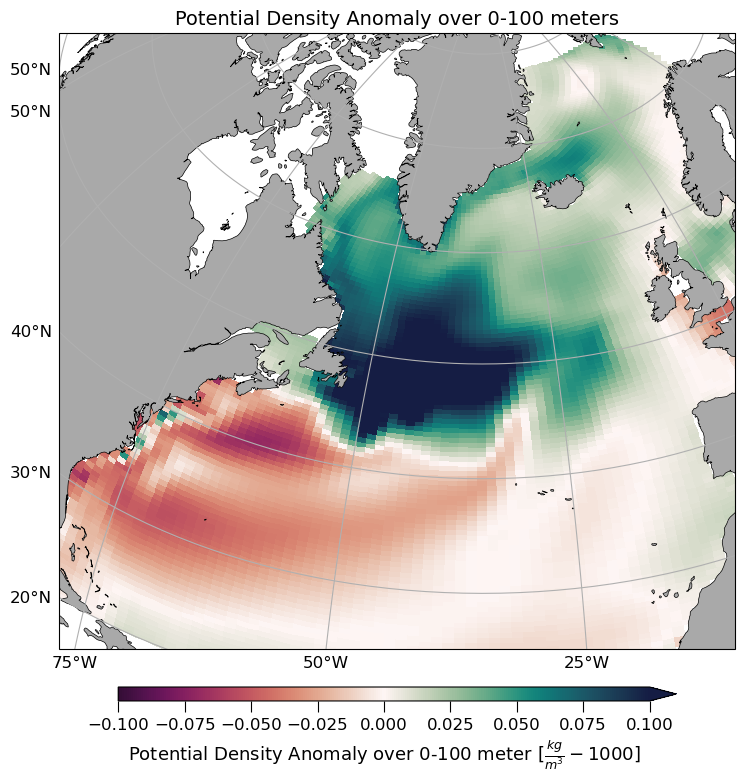

In [25]:
plotting_data = ds_sigma.SIGMA_2.sel(z_t=slice(5.0000000e+02, 1.0500000e+04)).mean('z_t').squeeze()

cbar_kwargs = {'orientation':'horizontal', 'shrink':0.8, 'aspect':40, 
               'label':r'Potential Density Anomaly over 0-100 meter [$\frac{kg}{m^3} -1000$]', 'pad': 0.05}

plt.figure(figsize=(9,10));
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80,-10, 25, 80], crs=ccrs.PlateCarree())

pc = plotting_data.plot.pcolormesh(ax=ax, 
                                    transform=ccrs.PlateCarree(),
                                    x='TLONG', 
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap=cmo.curl_r,
                                    vmin = vmin, vmax = vmax, 
                                    )
pc.colorbar.ax.xaxis.label.set_size(13)
pc.colorbar.ax.tick_params(axis='x', labelsize=12, size=8)
ax.tick_params(axis='both', which='both', labelsize=12, size=6)


gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

ax.add_feature(nature_coast);
plt.title('Potential Density Anomaly over 0-100 meters', fontsize=14)
plt.show()

### 0-300 meters

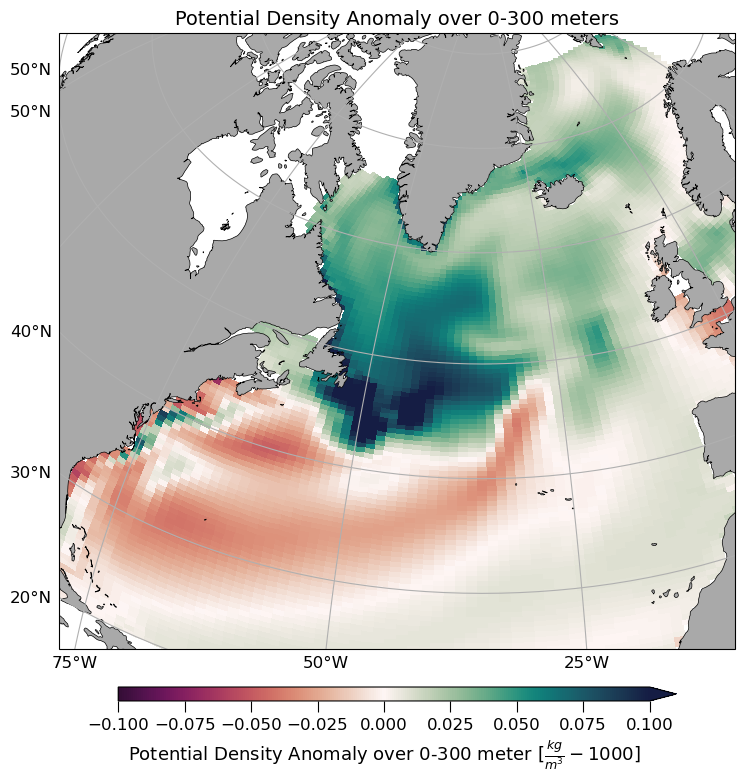

In [26]:
plotting_data = ds_sigma.SIGMA_2.sel(z_t=slice(5.0000000e+02, 3.0511922e+04)).mean('z_t').squeeze()

cbar_kwargs = {'orientation':'horizontal', 'shrink':0.8, 'aspect':40, 
               'label':r'Potential Density Anomaly over 0-300 meter [$\frac{kg}{m^3} -1000$]', 'pad': 0.05}

plt.figure(figsize=(9,10));
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80,-10, 25, 80], crs=ccrs.PlateCarree())

pc = plotting_data.plot.pcolormesh(ax=ax, 
                                    transform=ccrs.PlateCarree(),
                                    x='TLONG', 
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap=cmo.curl_r,
                                    vmin = vmin, vmax = vmax, 
                                    )
pc.colorbar.ax.xaxis.label.set_size(13)
pc.colorbar.ax.tick_params(axis='x', labelsize=12, size=8)
ax.tick_params(axis='both', which='both', labelsize=12, size=6)


gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

ax.add_feature(nature_coast);
plt.title('Potential Density Anomaly over 0-300 meters', fontsize=14)
plt.show()

### Temperature

In [29]:
temp_file = os.path.expanduser('~/phase1_CONDA/')+'/results/composites/temp_anomaly.nc'
ds_temp = xr.open_dataset(temp_file).roll(nlon=+100)

replacement_value = 0
# Replace non-finite values and masked values
ds_temp['TLAT'] = xr.where(
    np.logical_or(np.isnan(ds_temp['TLAT']), np.isinf(ds_temp['TLAT']) | np.ma.getmask(ds_temp['TLAT'])),
    replacement_value,
    ds_temp['TLAT']
)

ds_temp['TLONG'] = xr.where(
    np.logical_or(np.isnan(ds_temp['TLONG']), np.isinf(ds_temp['TLONG']) | np.ma.getmask(ds_temp['TLONG'])),
    replacement_value,
    ds_temp['TLONG']
)

In [30]:
vmin = -0.6 #-abs(ds_temp.TEMP).max()
vmax = -vmin #abs(ds_temp.TEMP).max()

### 0-100 meters

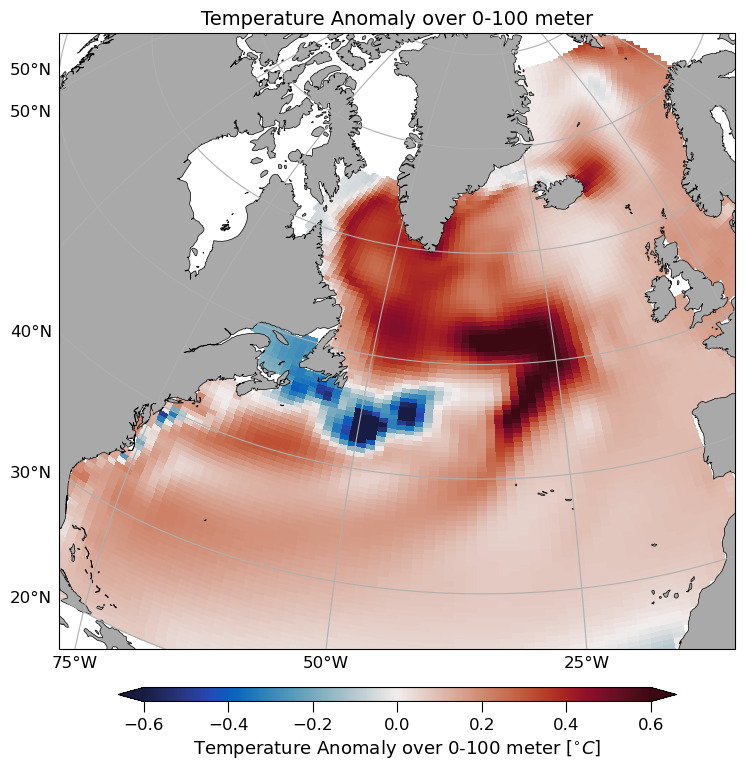

In [31]:
plotting_data = ds_temp.TEMP.sel(z_t=slice(5.0000000e+02, 1.0500000e+04)).mean('z_t').squeeze()

cbar_kwargs = {'orientation':'horizontal', 'shrink':0.8, 'aspect':40, 
               'label':'Temperature Anomaly over 0-100 meter [$^{\circ}C$]', 'pad': 0.05}

plt.figure(figsize=(9,10));
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80,-10, 25, 80], crs=ccrs.PlateCarree())

pc = plotting_data.plot.pcolormesh(ax=ax, 
                                    transform=ccrs.PlateCarree(),
                                    x='TLONG', 
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap=cmo.balance,
                                    vmin = vmin, vmax = vmax, 
                                    )
pc.colorbar.ax.xaxis.label.set_size(13)
pc.colorbar.ax.tick_params(axis='x', labelsize=12, size=8)
ax.tick_params(axis='both', which='both', labelsize=12, size=6)


gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

ax.add_feature(nature_coast);
#ax.coastlines()
plt.title('Temperature Anomaly over 0-100 meter', fontsize=14)
plt.show()

### 0-300 meters

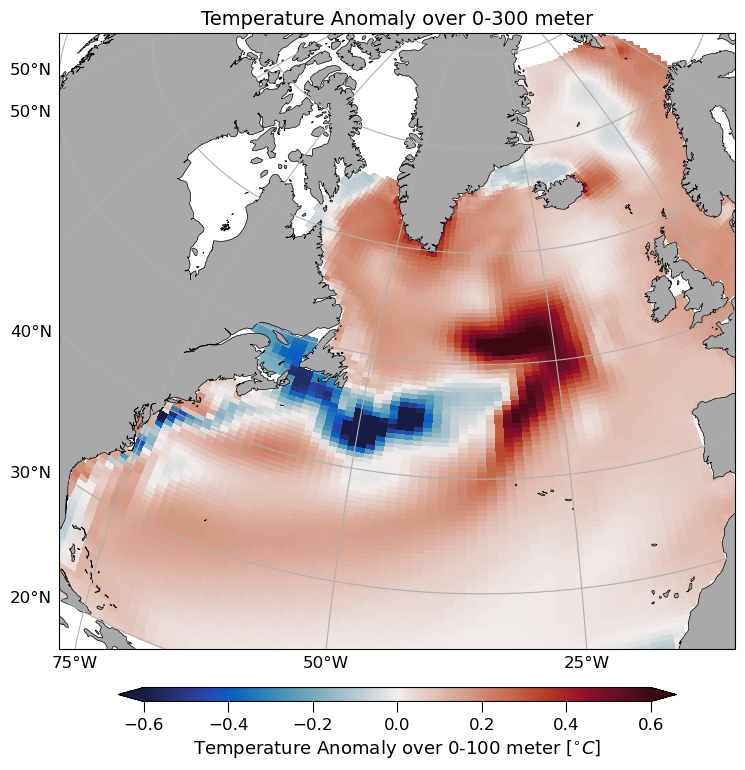

In [32]:
plotting_data = ds_temp.TEMP.sel(z_t=slice(5.0000000e+02, 3.0511922e+04)).mean('z_t').squeeze()


cbar_kwargs = {'orientation':'horizontal', 'shrink':0.8, 'aspect':40, 
               'label':'Temperature Anomaly over 0-100 meter [$^{\circ}C$]', 'pad': 0.05}

plt.figure(figsize=(9,10));
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80,-10, 25, 80], crs=ccrs.PlateCarree())

pc = plotting_data.plot.pcolormesh(ax=ax, 
                                    transform=ccrs.PlateCarree(),
                                    x='TLONG', 
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap=cmo.balance,
                                    vmin = vmin, vmax = vmax, 
                                    )
pc.colorbar.ax.xaxis.label.set_size(13)
pc.colorbar.ax.tick_params(axis='x', labelsize=12, size=8)
ax.tick_params(axis='both', which='both', labelsize=12, size=6)


gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

ax.add_feature(nature_coast);
#ax.coastlines()
plt.title('Temperature Anomaly over 0-300 meter', fontsize=14)
plt.show()

### Salinity

In [33]:
salt_file = os.path.expanduser('~/phase1_CONDA/')+'/results/composites/salt_anomaly.nc'
ds_salt = xr.open_dataset(salt_file).roll(nlon=+100)

replacement_value = 0
# Replace non-finite values and masked values
ds_salt['TLAT'] = xr.where(
    np.logical_or(np.isnan(ds_salt['TLAT']), np.isinf(ds_salt['TLAT']) | np.ma.getmask(ds_salt['TLAT'])),
    replacement_value,
    ds_salt['TLAT']
)

ds_salt['TLONG'] = xr.where(
    np.logical_or(np.isnan(ds_salt['TLONG']), np.isinf(ds_salt['TLONG']) | np.ma.getmask(ds_salt['TLONG'])),
    replacement_value,
    ds_salt['TLONG']
)

In [34]:
vmin = -0.2
vmax = -vmin

### 0-100 meters

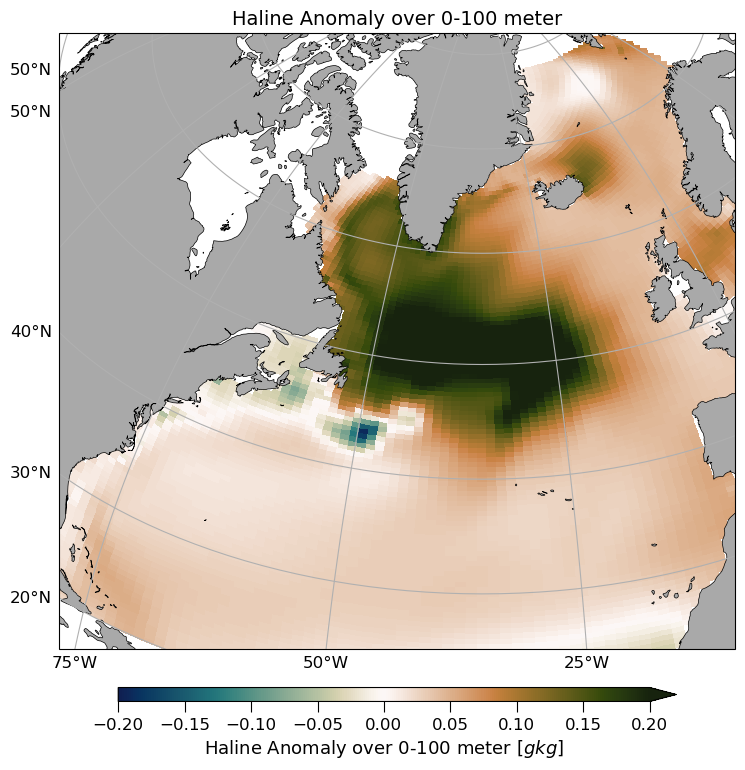

In [40]:
plotting_data = ds_salt.SALT.sel(z_t=slice(5.0000000e+02, 1.0500000e+04)).mean('z_t').squeeze()

cbar_kwargs = {'orientation':'horizontal', 'shrink':0.8, 'aspect':40, 
               'label':r'Haline Anomaly over 0-100 meter [$\frac{g}{kg}$]', 'pad': 0.05}

plt.figure(figsize=(9,10));
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80,-10, 25, 80], crs=ccrs.PlateCarree())

pc = plotting_data.plot.pcolormesh(ax=ax, 
                                    transform=ccrs.PlateCarree(),
                                    x='TLONG', 
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap=cmo.tarn_r,
                                    vmin = vmin, vmax = vmax, 
                                    )
pc.colorbar.ax.xaxis.label.set_size(13)
pc.colorbar.ax.tick_params(axis='x', labelsize=12, size=8)
ax.tick_params(axis='both', which='both', labelsize=12, size=6)


gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

ax.add_feature(nature_coast);
plt.title('Haline Anomaly over 0-100 meter', fontsize=14)
plt.show()

### 0-300 meters

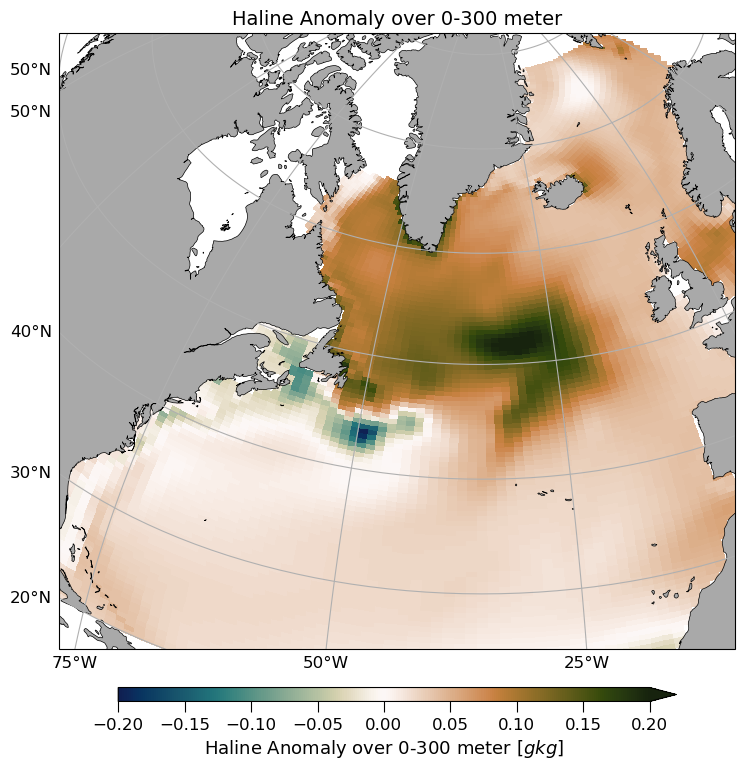

In [41]:
plotting_data = ds_salt.SALT.sel(z_t=slice(5.0000000e+02, 3.0511922e+04)).mean('z_t').squeeze()

cbar_kwargs = {'orientation':'horizontal', 'shrink':0.8, 'aspect':40, 
               'label':r'Haline Anomaly over 0-300 meter [$\frac{g}{kg}$]', 'pad': 0.05}

plt.figure(figsize=(9,10));
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80,-10, 25, 80], crs=ccrs.PlateCarree())

pc = plotting_data.plot.pcolormesh(ax=ax, 
                                    transform=ccrs.PlateCarree(),
                                    x='TLONG', 
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap=cmo.tarn_r,
                                    vmin = vmin, vmax = vmax, 
                                    )
pc.colorbar.ax.xaxis.label.set_size(13)
pc.colorbar.ax.tick_params(axis='x', labelsize=12, size=8)
ax.tick_params(axis='both', which='both', labelsize=12, size=6)


gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

ax.add_feature(nature_coast);
plt.title('Haline Anomaly over 0-300 meter', fontsize=14)
plt.show()